#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd. set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None

In [2]:
# Setting style
from matplotlib import rcParams

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 11.7,7.27

#### Importing Dataset

In [3]:
data_import = pd.read_csv("Edited Data/Merged data - Best sex life.csv")

#### Getting info about the dataset

## Cleaning Data and getting ready for analysis

In [4]:
data_copy = data_import.copy()

In [5]:
# Dropping unnecessary columns
columns_to_drop = ['Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'custom_value8', 'custom_value9',
       'custom_value7','Unnamed: 16', 'Unnamed: 22', 'Device Type', 'Region']

In [6]:
# Creating copy of the dataset
data_copy.drop(columns = columns_to_drop, inplace = True)

In [7]:
#adding columns 'First Occupation' and 'Second Occupation'
data_copy[['First Occupation','Second Occupation']] = data_copy["What's your occupation?"].str.split(',', expand=True)

In [8]:
# Dropping "What's your occupation?" and "What's your Gender" column
drop_cols = ["What's your occupation?","What is your gender?"]
data_copy.drop(columns = drop_cols, inplace = True)

In [9]:
# Renaming Columns to make them more suitable for analysis
data_copy.rename(columns = {
        'Respondent ID' : 'ID',
        'Which of the following best describes the industry you work in?': 'Your Industry',
        'Which of the following best describes your current job level?' : 'Job Level',
        'What state do you reside in?' : 'State',
        'How happy or unhappy are you with your current role at your job?' : 'Job Role Happiness',
        'What is the highest degree or level of school you have completed? If currently enrolled, highest degree received.' : 'Highest Degree Completed',
        'What is your marital status?' : 'Marital Status',
        'How satisfied or dissatisfied are you with your sex life?' : 'Sexual Satisfaction',
        'How often do you have sex?' : 'Sex Frequency',
        'How often do you have an orgasm during sexual intercourse?': 'Orgasm Frequency',
        'How often do you fake an orgasm?' : 'Orgasm Faking',
        'How would you rate your "performance" in bed?' : 'Sexual Performance',
        'How many times per week do you exercise or work out?' : 'Excercise Frequency',
        'How desirable do you find yourself?' : 'Desirable Level',
        'Would you agree with the following statement: My sex life was better before I graduated from college than after I graduated.' : 'Better Sex Before Graduating',
        'Household Income' : 'Income',
        'First Occupation' : 'Occupation',
        'Second Occupation' : '2nd Occupation'}, inplace = True)

In [10]:
work_data = data_copy.copy()

In [11]:
# Changing positions of the columns
column_names = ['ID', 'Gender', 'Age', 'Your Industry','Occupation',
       '2nd Occupation', 'Job Level', 'Income', 'State', 'Job Role Happiness',
       'Highest Degree Completed', 'Marital Status', 'Sexual Satisfaction',
       'Sex Frequency', 'Orgasm Frequency', 'Orgasm Faking',
       'Sexual Performance', 'Excercise Frequency', 'Desirable Level',
       'Better Sex Before Graduating' ]
work_data = work_data.reindex(columns = column_names)
work_data.head(3)

,ID,Gender,Age,Your Industry,Occupation,2nd Occupation,Job Level,Income,State,Job Role Happiness,Highest Degree Completed,Marital Status,Sexual Satisfaction,Sex Frequency,Orgasm Frequency,Orgasm Faking,Sexual Performance,Excercise Frequency,Desirable Level,Better Sex Before Graduating
0,1.336401e+10,Male,30-44,Entertainment & Leisure,Server,None,Middle Management,"$10,000-$24,999",Illinois,Very happy,High School,"Single, never married",Very satisfied,Every day,Always,Never,Far above average,Once per week,Very desirable,Somewhat agree
1,1.336401e+10,Male,30-44,Business Support & Logistics,Administrative assistant,Data Analyst,Intermediate,"$125,000-$149,999",Pennsylvania,Somewhat happy,Bachelor's Degree,Married or domestic partnership,Neither satisfied nor dissatisfied,Less than once a month,Usually,Never,Average,Several times per week,Somewhat desirable,Strongly disagree
2,1.336401e+10,Male,30-44,I am currently not employed,Carpenter,None,Other (please specify),"$10,000-$24,999",Idaho,Neither happy nor unhappy,Some High School,"Single, never married",Neither satisfied nor dissatisfied,Less than once a month,Never,Never,Below average,Once per week,Somewhat desirable,Neither agree nor disagree


## Data Analysis and Visualization

### Number of Participants per Gender

Previously, we could see that we have 563 entries which means that we have 563 unique participants. Now let's try to find out the gender of our participants:

In [12]:
gender_number = work_data['Gender'].value_counts().reset_index()

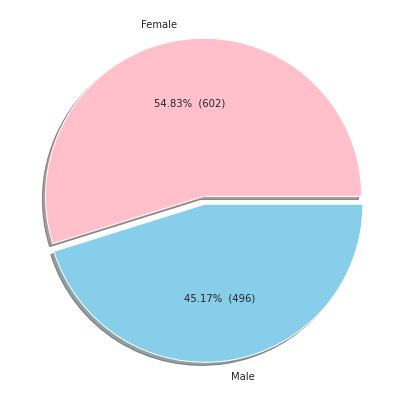

In [13]:
colors = sns.color_palette(['Pink', 'skyblue'])
labels = ['Female', 'Male']
explode = (0.05, 0.0)
values = [gender_number.Gender.sum()]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(gender_number.Gender,
        explode = explode, 
        labels = labels, 
        autopct= make_autopct(values),
        colors = colors,
        shadow = True);

We can clearly see that of our *1126 participants*, **54.83% or 602** participants are *female* participants and **45.17% or 496** participants are *male* participants. That means that our dataset is well balanced between genders. <br><br>

### Number of Participants per Occupation

After we found out the number of female and male participants, we can now proceed to calculating the number of participants per occupation. The goal is to see if any occupation is dominating over some other occupations.

In [14]:
occupation_one = work_data['Occupation'].value_counts().reset_index()
occupation_two = work_data['2nd Occupation'].value_counts().reset_index()

In [15]:
frames = [occupation_one, occupation_two]
occupation_df = pd.concat(frames, ignore_index=True)
occupation_df = occupation_df.head(20)

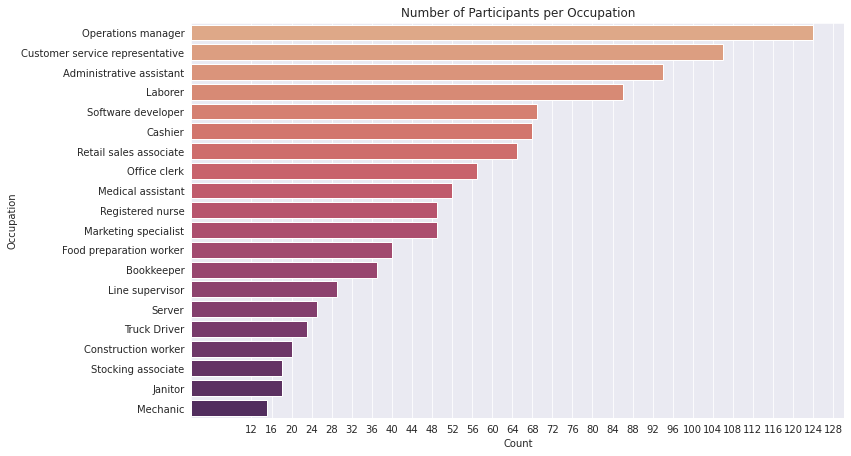

In [16]:
sns.barplot(x = occupation_df['Occupation'], y = occupation_df['index'], palette = 'flare')
plt.title('Number of Participants per Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(np.arange(12,130,4));

This BarPlot is showing us that the dominant occupation is 'Operations Manager' with 63 entries, by knowing that, we can point our focus to the top 10> occupations which are : <br>
>Operations Manager (124),<br>
>Customer Service Representative (106),<br>
>Administrative Assistant (94),<br>
>Laborer (86),<br>
>Software Developer (69),<br>
>Cashier (68), <br>
>Retail Sales Associate (65),<br>
>Medical Assistant (52), <br>
>Registered Nurse (49), <br>
>Marketing Specialist (49). <br>

We won't focus too much on other occupations because they have over 100% fewer entries than the top occupation 'Operations Manager' and because of that, they can not be seen as relevant.<br><br>

### Satisfaction With Job Role

Let's see how our participants are happy with their Job Role.

In [17]:
job_happiness = work_data[['Occupation' , 'Job Role Happiness']]

In [18]:
job_happiness['Job Role Happiness'].value_counts().reset_index()

,index,Job Role Happiness
0,Somewhat happy,388
1,Very happy,334
2,Neither happy nor unhappy,265
3,Somewhat unhappy,71
4,Very unhappy,38


Now that we have a clearer picture of our data, we can create a table where we can more easily see how the votes are distributed within each occupation. <br>

In [19]:
job_hpns = job_happiness[['Occupation', 'Job Role Happiness']].value_counts().reset_index()
job_hpns = job_hpns.groupby(['Occupation','Job Role Happiness']).sum()
job_hpns['Count'] = job_hpns.groupby(['Occupation','Job Role Happiness']).sum()
output = pd.pivot_table(data=job_hpns, 
                        index=['Occupation'], 
                        columns=['Job Role Happiness'], 
                        values='Count',
                        aggfunc='sum')
output

Job Role Happiness,Neither happy nor unhappy,Somewhat happy,Somewhat unhappy,Very happy,Very unhappy
Occupation,,,,,
Administrative assistant,18.0,37.0,5.0,30.0,4.0
Bartender,4.0,5.0,NaN,3.0,1.0
Bookkeeper,8.0,13.0,1.0,13.0,2.0
Carpenter,2.0,3.0,NaN,NaN,NaN
Cashier,19.0,24.0,2.0,20.0,3.0
Construction worker,3.0,3.0,2.0,11.0,1.0
Customer service representative,32.0,35.0,6.0,27.0,5.0
Electrician,NaN,4.0,NaN,6.0,NaN
Food preparation worker,11.0,12.0,4.0,12.0,1.0


Looking at the data we can see that there is not any major unhappiness with the job Role.<br><br>
We can see that in the category **'Neither happy nor unhappy'** most votes have: <br>
>'Customer service representative' (32) followed by, <br>
>'Laborer' (28),<br>
>'Office clerk'  (21).<br><br>

In the category **'Somewhat happy'**: <br>
>'Operations manager' (39) have most votes, followed by,<br>
>'Administrative assistant' (37),<br>
>'Customer service representative' (35),<br>
>'Software developer' (33),<br>
>'Laborer' (26).<br><br>

In the **'Very Happy'** category dominant Occupation is:
>'Operations manager' (58) followed by,<br>
>'Administrative assistant' (30),<br> 
>'Customer service representative' (27), <br>
>'Laborer' (21),<br>
>'Cashier' (20).<br>

### General Satisfaction with Sexual Life per Occupation


Now let's find out what is the general satisfaction with the sexual life of our participants. <br>
To have a better understanding of the level of satisfaction, I transformed sexual satisfaction answers into satisfaction levels.<br>
**The changes are**:<br>
>"Very Dissatisfied" -> 1,<br>
>"Dissatisfied" -> 2,<br>
>"Neither satisfied nor dissatisfied" -> 3,<br>
>"Satisfied" -> 4,<br>
>"Very satisfied" -> 5.<br>

In [20]:
stfc_df = work_data[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']]

In [21]:
my_map = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Satisfied': 4, 'Very satisfied': 5}
stfc_df = stfc_df.applymap(lambda s: my_map.get(s) if s in my_map else s)

#### Occupations with level 1 ('Very Dissatisfied') Sexual Satisfaction

In [22]:
sexual_satisfaction_1 = stfc_df[['Sexual Satisfaction', 'Occupation']].value_counts().reset_index().head(50)
sex_satisfaction_1 = sexual_satisfaction_1.groupby(['Sexual Satisfaction','Occupation' ]).sum()
satisfaction_df1 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 1]
satisfaction_df1['Sexual Satisfaction'] = satisfaction_df1['Sexual Satisfaction'].astype(int)
satisfaction_df1

,Sexual Satisfaction,Occupation,0
39,1,Operations manager,10
40,1,Customer service representative,9
43,1,Software developer,9
48,1,Laborer,8


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 2 ('Dissatisfied') Sexual Satisfaction

In [23]:
satisfaction_df2 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 2]
satisfaction_df2['Sexual Satisfaction'] = satisfaction_df2['Sexual Satisfaction'].astype(int)
satisfaction_df2

,Sexual Satisfaction,Occupation,0
27,2,Operations manager,14
28,2,Customer service representative,13
31,2,Marketing specialist,12
34,2,Laborer,12
38,2,Administrative assistant,10
44,2,Software developer,9


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 3 ('Neither satisfied nor dissatisfied') Sexual Satisfaction

In [24]:
satisfaction_df3 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 3]
satisfaction_df3['Sexual Satisfaction'] = satisfaction_df3['Sexual Satisfaction'].astype(int)
satisfaction_df3

,Sexual Satisfaction,Occupation,0
1,3,Customer service representative,36
2,3,Administrative assistant,35
3,3,Operations manager,34
5,3,Laborer,28
7,3,Office clerk,26
13,3,Cashier,22
15,3,Medical assistant,19
21,3,Food preparation worker,15
24,3,Bookkeeper,14
25,3,Software developer,14


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 4 ('Satisfied') Sexual Satisfaction

In [25]:
satisfaction_df4 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 4]
satisfaction_df4['Sexual Satisfaction'] = satisfaction_df4['Sexual Satisfaction'].astype(int)
satisfaction_df4

,Sexual Satisfaction,Occupation,0
0,4,Operations manager,39
4,4,Administrative assistant,31
8,4,Software developer,26
9,4,Customer service representative,25
10,4,Laborer,24
11,4,Retail sales associate,23
17,4,Cashier,18
18,4,Marketing specialist,16
19,4,Registered nurse,15
22,4,Office clerk,15


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

#### Occupations with level 5 ('Very Satisfied') Sexual Satisfaction

In [26]:
satisfaction_df5 = sexual_satisfaction_1[sexual_satisfaction_1['Sexual Satisfaction'] == 5]
satisfaction_df5['Sexual Satisfaction'] = satisfaction_df5['Sexual Satisfaction'].astype(int)
satisfaction_df5

,Sexual Satisfaction,Occupation,0
6,5,Operations manager,27
12,5,Customer service representative,23
14,5,Cashier,21
16,5,Retail sales associate,19
20,5,Administrative assistant,15
26,5,Laborer,14
29,5,Registered nurse,13
35,5,Software developer,11
37,5,Medical assistant,11
45,5,Bookkeeper,9


The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>

We can see that we have some 'Occupations' that are repeating in some Sexual Satisfaction groups. <br>
Let's use Occupations from level 1 and level 2 and categorise them as 'Dissatisfied' and from level 4 and level 5 as 'Satisfied'.<br><br>
Occupations that we can categorise as **Dissatisfied** are:<br>
>Operations manager (24), <br>
>Customer service representative (22), <br>
>Software developer (14), <br>
>Laborer (20), <br>
>Software developer (18), <br>
>Marketing specialist (12), <br>
>Administrative assistant (10) <br>
<br>

Occupations that we can categorise as **Satisfied** are:
>Operations Manager (66)<br>
>Customer service representative (48)<br>
>Administrative assistant (46) <br>
>Retail sales associate (42)<br>
>Cashier (39)<br>
>Laborer (38)<br>
>Software developer (37)<br>
>Registered nurse (28)<br>
>Medical assistant (26)<br>
>Bookkeeper (17)<br>
>Marketing specialist (16)<br>
>Office clerk (15)<br>
>Food preparation worker (12)<br>
>Janitor (8)<br>
>Line supervisor (7)<br>

###  More filtered data with 'Exercise Frequency' column

Let's now filter data furthermore and try to see if there is any correlation between *Exercise Frequency* and *Sexual Satisfaction*.

In [52]:
sexual_satisfaction_2 = stfc_df[['Excercise Frequency', 'Sexual Satisfaction', 'Occupation']].value_counts().reset_index()
sexual_satisfaction_2['Sexual Satisfaction'] = sexual_satisfaction_2['Sexual Satisfaction'].astype(int)
sex_satisfaction_2 = sexual_satisfaction_2.groupby([ 'Excercise Frequency', 'Sexual Satisfaction', 'Occupation']).sum()
sex_satisfaction_2.head(10) # <---- Delete .head(10) to see full list

0
Excercise Frequency   Sexual Satisfaction Occupation                        
Every day of the week 1                   Construction worker              1
                                          Customer service representative  1
                                          Food preparation worker          1
                                          Laborer                          1
                                          Marketing specialist             2
                                          Registered nurse                 1
                                          Software developer               2
                                          Stocking associate               1
                      2                   Laborer                          1
                                          Line supervisor                  2

Let's calculate the amount of sexually satisfied occupations per "exercise frequency" : <br>
From 1126 unique answers **unsatisfied are 217 or 19.27%** of the participants, and **544 or 48.31% are satisfied** participants. **We have 327 participants more in the satisfied group** which we must take into consideration in further analysis. <br>
Now let's see what number and percentage from 217 unsatisfied participants are in each *'Exercise Frequency'* group. <br>
**Unsatisfied:** <br>
>Group 1: 'I never work out or exercise (39) or 17.97%'<br>
>Group 2: 'Less than once per week (41) or 18.89%', <br>
>Group 3: 'Once per week' (38) or 17.51%,<br>
>Group 4: 'Several times per week (80) or 36.87%',<br>
>Group 5: 'Every day of the week' (19) or 8.76%<br>

We can see that most people in unsatisfied group exercise several times per week, but we can also see that compared to the "satisfied" group much bigger percentage "never work out" or work out "less than once per week" and also much smaller percentage practice "several times per week" or "every day of the week". <br>

Let's see what number and percentage from 544 satisfied participants are in each *'Exercise Frequency'* group. <br>
**Satisfied:**<br>
>'I never work out or exercise' (76) 13.97%, <br>
>'Less than once per week' (56) 10.29%,  <br>
>'Once per week' (95) 17.46%, <br>
>'Several times per week' (230) 42.28%, <br>
>'Every day of the week'(87) 15.99% <br>

Here we can see that compared to the "unsatisfied" group, the leap from "never work out" and "less than once per week" to "several times per week" is much higher. We also have a smaller percentage of participants in the "never work out" and "less than once per week" group although we have more than double participants in the satisfied group which only confirms that satisfied people tend to work out more. 

### Plotting average level of Sexual Satisfaction

Lastly let's plot the average level of sexual satisfaction per *'Occupation'*.

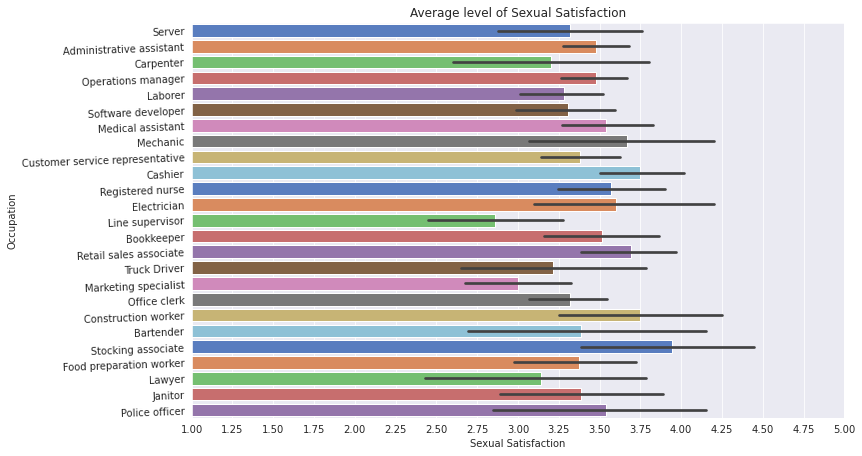

In [28]:
sns.barplot(y =stfc_df['Occupation'] ,x = stfc_df['Sexual Satisfaction'], palette = 'muted')
plt.xticks(np.arange(0,5.5,0.25))
plt.yticks(rotation = 2)
plt.xlim(1,5)
plt.title('Average level of Sexual Satisfaction');

In the plot above we can see levels of average *'Sexual Satisfaction'* of our participants based on their *'Occupation'*. <br> The black horizontal lines represent *'Standard Deviation'* of our data, and here we can see that in some 'Occupations' deviation is smaller than in the others, keeping that deviation in mind we can conclude that we can use this plot only **as a reference**, but we can get some sense of a range of our data.

In [29]:
work_data.to_csv('Final.csv')

### Comparisson between sexualy "Very satisfied" and "Very Dissatisfied" occupations based on their Exercise routine

Let's create dataframe with 'Very Satisfied' occupations.

In [30]:
a_df = work_data[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']]
my_map = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Satisfied': 4, 'Very satisfied': 5}
a_df = a_df.applymap(lambda s: my_map.get(s) if s in my_map else s)

In [31]:
satisfied = a_df[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
satisfied['Sexual Satisfaction'] = satisfied['Sexual Satisfaction'].astype(int)
satistied_df = satisfied[satisfied['Sexual Satisfaction'] == 5]
satisfied_final = satistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
satisfied_final['Count'] = satistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
satisfied_final[satisfied_final['Count']>2]

0  \
Excercise Frequency          Sexual Satisfaction Occupation                            
Every day of the week        5                   Cashier                           3   
                                                 Customer service representative   5   
                                                 Laborer                           3   
                                                 Operations manager               10   
                                                 Registered nurse                  3   
                                                 Software developer                3   
I never work out or exercise 5                   Administrative assistant          5   
                                                 Cashier                           5   
                                                 Office clerk                      3   
                                                 Operations manager                3   
                                                 Registered nurse                  3   
Less than once per week      5                   Laborer                           3   
                                                 Operations manager                3   
Once per week                5                   Cashier                           5   
                                                 Medical assistant                 3   
Several times per week       5                   Administrative assistant          7   
                                                 Bookkeeper                        6   
                                                 Cashier                           5   
                                                 Customer service representative  13   
                                                 Laborer                           5   
                                                 Medical assistant                 3   
                                                 Operations manager                8   
                                                 Registered nurse                  4   
                                                 Retail sales associate           15   
                                                 Software developer                7   
                                                 Stocking associate                4   
                                                 Truck Driver                      3   

                                                                                  Count  
Excercise Frequency          Sexual Satisfaction Occupation                              
Every day of the week        5                   Cashier                              3  
                                                 Customer service representative      5  
                                                 Laborer                              3  
                                                 Operations manager                  10  
                                                 Registered nurse                     3  
                                                 Software developer                   3  
I never work out or exercise 5                   Administrative assistant             5  
                                                 Cashier                              5  
                                                 Office clerk                         3  
                                                 Operations manager                   3  
                                                 Registered nurse                     3  
Less than once per week      5                   Laborer                              3  
                                                 Operations manager                   3  
Once per week                5                   Cashier                              5  
                                                 Medical assistant                    3  


We can see that a large proportion of sexually satisfied occupations exercise **'Several times per week'** (80) or **'Every day of the week'** (27).
Now let's take a look at the data frame below that contains *Dissatisfied occupations*.<br>

In [32]:
dissatisfied = a_df[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
dissatisfied['Sexual Satisfaction'] = dissatisfied['Sexual Satisfaction'].astype(int)
dissatistied_df = dissatisfied[dissatisfied['Sexual Satisfaction'] == 1 ]
dissatisfied_final = dissatistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
dissatisfied_final['Count'] = dissatistied_df.groupby(['Excercise Frequency','Sexual Satisfaction','Occupation']).sum()
dissatisfied_final[dissatisfied_final['Count']>2]

0  \
Excercise Frequency          Sexual Satisfaction Occupation                           
I never work out or exercise 1                   Customer service representative  4   
                                                 Operations manager               3   
                                                 Truck Driver                     3   
Several times per week       1                   Administrative assistant         3   
                                                 Laborer                          3   
                                                 Line supervisor                  3   
                                                 Operations manager               4   
                                                 Software developer               3   

                                                                                  Count  
Excercise Frequency          Sexual Satisfaction Occupation                              
I never work out or exercise 1                   Customer service representative      4  
                                                 Operations manager                   3  
                                                 Truck Driver                         3  
Several times per week       1                   Administrative assistant             3  
                                                 Laborer                              3  
                                                 Line supervisor                      3  
                                                 Operations manager                   4  
                                                 Software developer                   3

Here we have a data frame with sexually *'Very Dissatisfied'* occupations. As we can see, the data in this data set is significantly smaller so we can not draw a clear line but if we reflect to *"More filtered data with 'Exercise Frequency' column"* part in this analysis, we can see that if sexual satisfaction is lower then more common answers are 'I never work out or exercise', 'Less than once per week' or 'Once per week'.

### Comparison between Male and Female Participants

In [33]:
work_data= work_data.applymap(lambda s: my_map.get(s) if s in my_map else s)

### Sexual Satisfaction Per Gender

In [34]:
satisfaction_per_gender = work_data[['Gender', 'Sexual Satisfaction']].value_counts().reset_index()
satisfaction_per_gender = satisfaction_per_gender.groupby(['Gender', 'Sexual Satisfaction']).sum()
satisfaction_per_gender['Count'] = satisfaction_per_gender.groupby(['Gender', 'Sexual Satisfaction']).sum()
satisfaction_per_gender['Percent'] = round(satisfaction_per_gender['Count'] / satisfaction_per_gender['Count'].sum()*100,2)
satisfaction_per_gender

0  Count  Percent
Gender Sexual Satisfaction                     
Female 1.0                   28     28     2.55
       2.0                   63     63     5.74
       3.0                  201    201    18.31
       4.0                  179    179    16.30
       5.0                  131    131    11.93
Male   1.0                   57     57     5.19
       2.0                   69     69     6.28
       3.0                  130    130    11.84
       4.0                  149    149    13.57
       5.0                   91     91     8.29

Here we can see that female participant are generally more satisfied with their sex lives. In the far right column, we can see how our data is distributed in percentages. We see that at the level of sexual satisfaction 1 we have a lower share of women compared to men, also from level 2 to level 3 in the women's group the improvement is 13%, and in the men's group, the improvement is only 5%. Regarding sexual satisfaction at level 5, we see that there is 3.6% more data in the female group, but we can also attribute this to the fact that we have almost 9% more female participants in the survey, so this difference is expected. <br>

### Sexual Satisfaction filtered by Gender and by Occupation

#### List of 'Satisfied' participants grouped by Gender and Occupation

Let's see which profession has the best sex life when we divide our data by the gender of participants. <br>

In [35]:
sat_per_gender_and_occ = work_data[['Gender', 'Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
sat_per_gender_and_occ= sat_per_gender_and_occ[(sat_per_gender_and_occ['Sexual Satisfaction'] == 5)]
sat_per_gender_and_occ_1 = sat_per_gender_and_occ.groupby(['Gender', 'Sexual Satisfaction','Occupation']).sum()
sat_per_gender_and_occ_1['Count'] = sat_per_gender_and_occ.groupby(['Gender', 'Sexual Satisfaction','Occupation']).sum()
sat_per_gender_and_occ_1[sat_per_gender_and_occ_1['Count']>2]

0  Count
Gender Sexual Satisfaction Occupation                                
Female 5.0                 Administrative assistant         13     13
                           Bartender                         3      3
                           Bookkeeper                        6      6
                           Cashier                          14     14
                           Customer service representative  16     16
                           Food preparation worker           5      5
                           Laborer                           6      6
                           Medical assistant                 9      9
                           Office clerk                      4      4
                           Operations manager               10     10
                           Registered nurse                 10     10
                           Retail sales associate           12     12
                           Server                            3      3
                           Software developer                4      4
                           Stocking associate                4      4
Male   5.0                 Bookkeeper                        3      3
                           Cashier                           3      3
                           Construction worker               5      5
                           Customer service representative   7      7
                           Laborer                           8      8
                           Marketing specialist              3      3
                           Mechanic                          3      3
                           Operations manager               16     16
                           Police officer                    3      3
                           Registered nurse                  3      3
                           Retail sales associate            7      7
                           Software developer                7      7
                           Stocking associate                3      3
                           Truck Driver                      4      4

Earlier, we analyzed the data on which occupation is generally the most satisfied with sex life, but what we did not know was how much of these answers were given by females and how many by males. Now that we have our data filtered by gender we can have a clearer image of which occupations are dominant for Females and which ones are dominant for males. <br>
**Occupations in the 'Female' group with the most answers are:**<br>
>Customer service representative (16),<br>
>Cashier (14),<br>
>Administrative assistant (13),<br>
>Retail sales associate (12),<br>
>Operations manager (10),<br>
>Registered nurse (10),<br>
>Medical assistant (9),<br>
>Bookkeeper (6).<br>

**Occupations in the 'Male' group with the most answers are:**<br>
>Operations manager (16),<br>
>Laborer (8),<br>
>Customer service representative (7),<br>
>Retail sales associate (7),<br>
>Software developer (7),<br>
>Construction worker (5).<br>

#### List of 'Dissatisfied' participants grouped by Gender and Occupation

In [36]:
dissat_per_gender_and_occ = work_data[['Gender', 'Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
dissat_per_gender_and_occ= dissat_per_gender_and_occ[(dissat_per_gender_and_occ['Sexual Satisfaction'] == 1)]
dissat_per_gender_and_occ_1 = dissat_per_gender_and_occ.groupby(['Gender', 'Sexual Satisfaction','Occupation']).sum()
dissat_per_gender_and_occ_1['Count'] = dissat_per_gender_and_occ.groupby(['Gender', 'Sexual Satisfaction','Occupation']).sum()
dissat_per_gender_and_occ_1[dissat_per_gender_and_occ_1['Count']>2]

0  Count
Gender Sexual Satisfaction Occupation                               
Female 1.0                 Customer service representative  4      4
                           Food preparation worker          3      3
                           Laborer                          3      3
Male   1.0                 Customer service representative  5      5
                           Laborer                          5      5
                           Line supervisor                  4      4
                           Marketing specialist             4      4
                           Operations manager               9      9
                           Retail sales associate           4      4
                           Software developer               8      8

Occcupations that are dissatisfied with sexual life grouped by **Female participants**:
>Customer service representative (4), <br>
>Food preparation worker (3), <br>
>Laborer (3). <br>

Occcupations that are dissatisfied with sexual life grouped by **Male participants**:
>Operations manager (9), <br>
>Software developer (8), <br>
>Customer service representative (5), <br>
>Laborer (5). <br>

#### List of 'Satisfied' participants grouped by Gender, Occupation and Exercise Frequency

Let's now filter our data furthermore by adding the 'Exercise Frequency' filter.

In [37]:
a = work_data[['Gender', 'Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index()
a= a[(a['Sexual Satisfaction'] == 5)]
a = a.groupby(['Gender', 'Sexual Satisfaction','Excercise Frequency', 'Occupation']).sum()
a['Count'] =a.groupby(['Gender', 'Sexual Satisfaction','Excercise Frequency', 'Occupation']).sum()
#sat_per_gender_and_occ_1[sat_per_gender_and_occ_1['Count']>1]
a[a['Count']>2]

0  \
Gender Sexual Satisfaction Excercise Frequency          Occupation                            
Female 5.0                 Every day of the week        Customer service representative   3   
                                                        Operations manager                5   
                           I never work out or exercise Administrative assistant          5   
                                                        Cashier                           5   
                           Once per week                Cashier                           3   
                           Several times per week       Administrative assistant          6   
                                                        Bookkeeper                        5   
                                                        Cashier                           4   
                                                        Customer service representative  10   
                                                        Medical assistant                 3   
                                                        Operations manager                3   
                                                        Registered nurse                  3   
                                                        Retail sales associate            8   
                                                        Software developer                4   
Male   5.0                 Every day of the week        Operations manager                5   
                                                        Software developer                3   
                           I never work out or exercise Operations manager                3   
                           Several times per week       Customer service representative   3   
                                                        Laborer                           3   
                                                        Operations manager                5   
                                                        Retail sales associate            7   
                                                        Software developer                3   
                                                        Truck Driver                      3   

                                                                                         Count  
Gender Sexual Satisfaction Excercise Frequency          Occupation                              
Female 5.0                 Every day of the week        Customer service representative      3  
                                                        Operations manager                   5  
                           I never work out or exercise Administrative assistant             5  
                                                        Cashier                              5  
                           Once per week                Cashier                              3  
                           Several times per week       Administrative assistant             6  
                                                        Bookkeeper                           5  
                                                        Cashier                              4  
                                                        Customer service representative     10  
                                                        Medical assistant                    3  
                                                        Operations manager                   3  
                                                        Registered nurse                     3  
                                                        Retail sales associate               8  
                                                        Software developer                   4  
Male   5.0                 Every day of the week        Operations manager                   5  
                                                        Software 

We can confirm the pattern that we previously discovered, participants that are satisfied with their sexual life tend to exercise more, although we can see that in the female group answer "I never work out or exercise" is slightly more common.

### Grouping by States and Sexual satisfaction by gender and Occupation

#### States with the most participants

In [38]:
top_states = work_data['State'].value_counts().head(30)
top_states.head(20)

California        139
Florida            89
New York           76
Texas              65
Ohio               42
Illinois           39
Pennsylvania       39
Georgia            37
New Jersey         34
Virginia           29
North Carolina     28
Kentucky           27
Washington         27
Connecticut        26
Wisconsin          26
Massachusetts      23
Michigan           21
Colorado           21
Maryland           20
Alabama            20
Name: State, dtype: int64

Here is the list of the States with the most participants in the survey. We can see that California is very dominant, followed by Florida, New York, Texas, Ohio etc. <br>

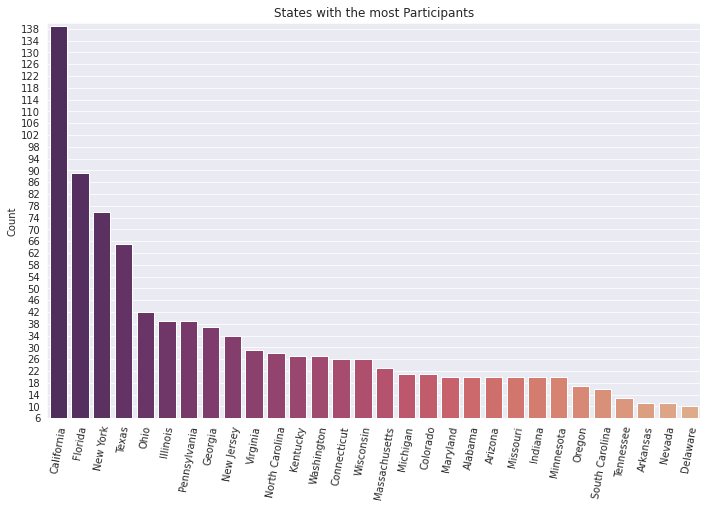

In [39]:
sns.barplot(y = top_states , x = top_states.index, palette = 'flare_r')
plt.title('States with the most Participants')
plt.yticks(np.arange(2,142,4))
plt.ylabel('Count')
plt.xticks(rotation = 80)
plt.ylim(6,140);

### Female participants grouped by State, ranked by Occupation and Exercise Frequency

Let's try to see which Occupation in which State is most Sexually satisfied based on their Exercise Frequency. 

In [40]:
sat_w_per_state = work_data[['Gender', 'Occupation', 'State', 'Sexual Satisfaction', 'Excercise Frequency']].value_counts().reset_index()
sat_w_per_state = sat_w_per_state[(sat_w_per_state['Sexual Satisfaction'] == 5) & (sat_w_per_state['Gender'] == 'Female')]
sat_w_per_state = sat_w_per_state.groupby(['State','Gender', 'Sexual Satisfaction', 'Occupation']).sum()
sat_w_per_state['Count'] = sat_w_per_state.groupby(['State','Gender', 'Sexual Satisfaction', 'Occupation']).sum()
sat_w_per_state = sat_w_per_state[sat_w_per_state['Count']>1]
sat_w_per_state

0  \
State      Gender Sexual Satisfaction Occupation                           
Alabama    Female 5.0                 Cashier                          2   
California Female 5.0                 Administrative assistant         3   
                                      Bookkeeper                       2   
                                      Customer service representative  4   
Florida    Female 5.0                 Bookkeeper                       2   
                                      Medical assistant                3   
                                      Retail sales associate           2   
                                      Software developer               2   
New Jersey Female 5.0                 Customer service representative  2   
Ohio       Female 5.0                 Cashier                          2   
                                      Customer service representative  3   
                                      Operations manager               2   
Texas      Female 5.0                 Retail sales associate           3   

                                                                       Count  
State      Gender Sexual Satisfaction Occupation                              
Alabama    Female 5.0                 Cashier                              2  
California Female 5.0                 Administrative assistant             3  
                                      Bookkeeper                           2  
                                      Customer service representative      4  
Florida    Female 5.0                 Bookkeeper                           2  
                                      Medical assistant                    3  
                                      Retail sales associate               2  
                                      Software developer                   2  
New Jersey Female 5.0                 Customer service representative      2  
Ohio       Female 5.0                 Cashier                              2  
                                      Customer service representative      3  
                                      Operations manager                   2  
Texas      Female 5.0                 Retail sales associate               3

### Male participants grouped by State, ranked by Occupation and Exercise Frequency

In [41]:
sat_m_per_state = work_data[['Gender', 'Occupation', 'State', 'Sexual Satisfaction', 'Excercise Frequency']].value_counts().reset_index()
sat_m_per_state = sat_m_per_state[(sat_m_per_state['Sexual Satisfaction'] == 5) & (sat_m_per_state['Gender'] == 'Male')]
sat_m_per_state = sat_m_per_state.groupby(['State','Gender', 'Sexual Satisfaction', 'Occupation']).sum()
sat_m_per_state['Count'] = sat_m_per_state.groupby(['State','Gender', 'Sexual Satisfaction', 'Occupation']).sum()
sat_m_per_state = sat_m_per_state[sat_m_per_state['Count']>1]
sat_m_per_state

0  Count
State     Gender Sexual Satisfaction Occupation                               
Arizona   Male   5.0                 Construction worker              2      2
Florida   Male   5.0                 Customer service representative  2      2
Illinois  Male   5.0                 Operations manager               2      2
Indiana   Male   5.0                 Operations manager               2      2
New York  Male   5.0                 Electrician                      2      2
Ohio      Male   5.0                 Laborer                          3      3
Texas     Male   5.0                 Laborer                          2      2
                                     Operations manager               2      2
                                     Retail sales associate           2      2
Wisconsin Male   5.0                 Software developer               2      2